# **Regressió lineal, multilineal i polinòmica**

En aquest apartat es mostrarà com, d'una manera senzilla, podem fer diferents tipus de regressions. En concret es mostrarà com fer una regressió lineal,
una regressió multilineal i una interpolació polinòmica.

Per tal de poder fer-ho, caldrà importar diverses llibreries.


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  r2_score

Un cop importats els paquets que necessitem, ja podem començar a fer les regressions.

# **Regressió lineal**

Com ja sabem una regressió lineal té la següent forma:

$$y=ax+b$$

on *a* és el pendent i *b* és l'ordenada a l'origen.

Primer definirem els punts que volem interpolar (x i y).

In [2]:
x = [0,1,2,3,4,5,6,7,8,9,10]
y = [-0.693,-1.227,-1.656,-2.144,-2.688,-3.254,-3.789,-4.419,-4.506,-5.334,-5.298]

Ara ja podem crear la regressió lineal i fem la gràfica.

Ordenada a l'origen = -0.7437272727272726
Pendent = -0.48776363636363645

R^2 = 0.9900817090431363


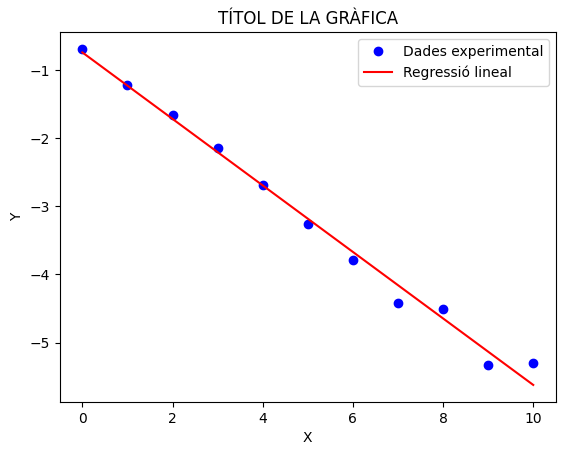

In [3]:
slope, intercept, R, p_value, std_err = scipy.stats.linregress(x,y)

print("Ordenada a l'origen =",intercept)
print("Pendent =",slope)
print("\nR^2 =",R**2)

plt.plot(x,y,'bo',label='Dades experimental')
plt.plot(x,intercept + slope*np.array(x),color='red',label='Regressió lineal')
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("TÍTOL DE LA GRÀFICA")
plt.show()

La comanda `slope, intercept, R, p_value, std_err = scipy.stats.linregress(x,y)` el que fa és dir que faci una regressió linal amb les dades `x` i `y` i que
digui el pendent (`slope`), l'ordenada a l'origen (`intercept`), el valor de R (`R`), el valor p (`p_value`) i l'error estàndard (`std_err`).
Sempre que vulguem referir-nos a qualsevol d'aquest paràmetres, ho haurem de fer pel nom establert, per exemple quan vulguem calcular el valor de \\(r^2\\),
simplement haurem d'afegir `R**2`, com en el codi anterior.

# **Regressió multilineal**

Python també ens dona l'opció de poder fer regressions multilineals de l'estil:

$$y=a_1x_1+a_2x_2+a_3x_3+\cdots+a_nx_n+b$$

Per això només caldrà definir totes les entrades que volguem i generar el model multilineal.

In [11]:
df = pd.DataFrame({'x': [1, 2, 2, 4, 2, 1, 5, 4, 2, 4, 4, 3, 6],
                   'y': [1, 3, 3, 5, 2, 2, 1, 1, 0, 3, 4, 3, 2],
                   'z': [76, 78, 85, 88, 72, 69, 94, 94, 88, 92, 90, 75, 96]})

w, q = df[['x', 'y']], df['z']

regr = LinearRegression()
regr.fit(w, q)

R2 = regr.score(w, q)

print("Equació:",regr.coef_[0],"* X +",regr.coef_[1],'* Y +', regr.intercept_)
print("R^2 =",R2)

Equació: 5.127492447129909 * X + -1.2120845921450152 * Y + 71.404833836858
R^2 = 0.71755417141059


# **Regressió polinòmica**

Per a la regressió polinòmica farem un procediment semblant a la regressió lineal simple: definirem les dades, generarem el polinomi interpolador del grau que
nosaltres indiquem i el graficarem.

Recordem que una regressió polinòmica és del tipus:

$$y=b+a_1x+a_2x^2+a_3x^3+\cdot+a_nx^n$$

Equació:
           3         2
-0.03032 x + 1.343 x - 15.54 x + 113.8

R^2 = 0.9432150416451026


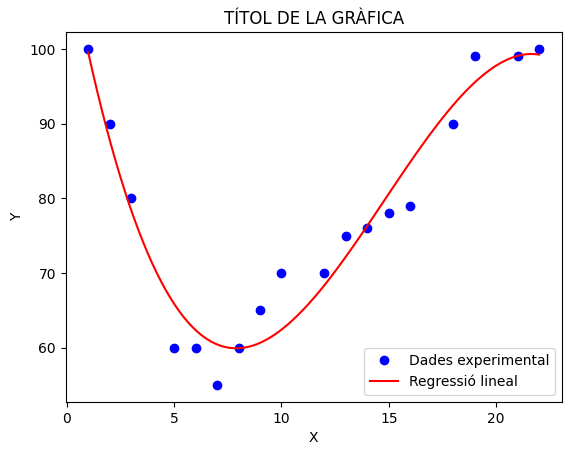

In [13]:
x =[1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y =[100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]
grau = 3

model = np.poly1d(np.polyfit(x, y, grau))

myline = np.linspace(min(x), max(x), 100)

print("Equació:\n",model)
print("\nR^2 =",r2_score(y, model(x)))

plt.plot(x,y,'bo',label='Dades experimental')
plt.plot(myline, model(myline),color='red',label='Regressió lineal')
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("TÍTOL DE LA GRÀFICA")
plt.show()